[2025-01-03 Fiddler](https://thefiddler.substack.com/p/can-you-squeeze-the-sheets)
====================
_(I suggested this puzzle.)_

* Fiddler: [Show work](#Fiddler) - [answer](#Fiddler-answer)
* Extra credit: [Show work](#Extra-credit) - [answer](#Extra-credit-answer)

First, load the code in the [appendix](#Appendix).

In [1]:
load('20250103.sage')

Fiddler
-------

Let $s$ be the distance between the axes of adjacent deformations.
Then, $w = \sqrt{4-s^2/4}$ is the distance between the sheets.

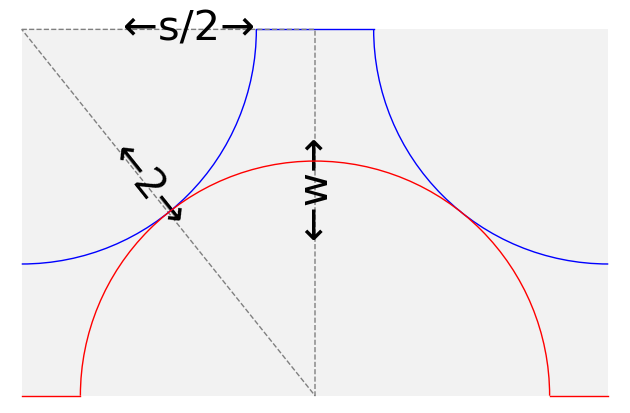

In [2]:
plot_fiddler(2.5,annotate=true)

In [3]:
w(s) = sqrt(4-s^2/4)

The minimum $s$ is 2, and the maximum $s$ is $2\sqrt3$,
when $w = 1$.

In [4]:
assume(s > 0)
solve(w(s) == 1, s)

[s == 2*sqrt(3)]

The empty volume between the sheets for an area of $sh$ is
$shw - h\pi$, so the empty volume per unit area is $w - \pi/s$.
Plotting:

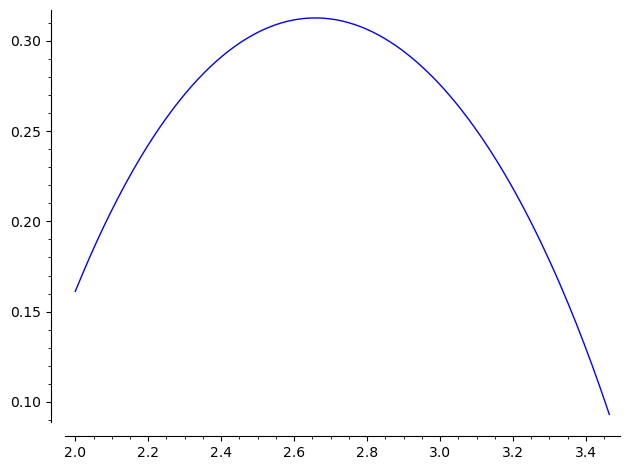

In [5]:
plot(w(s)-pi/s,2,2*sqrt(3))

Finding the maximum numerically,

In [6]:
find_local_maximum(w(s)-pi/s,2,2*sqrt(3))

(0.31263798657420216, 2.6581018801360017)

The exact solution can be found by solving a quadratic equation for $s^2$.

### Fiddler answer

In [7]:
forget()
assume(s > 0)
assume(s, 'real')
s_max = solve((derivative(w(s),s) == derivative(pi/s))^2, s)[0].rhs().simplify_full()
s_max *= sqrt(2/3)*3/sqrt(3)/sqrt(2)
%display latex
exact_result(s_max)

\sqrt{\frac{2}{3}} \sqrt{-\frac{3^{\frac{1}{3}} \pi^{2} - 3^{\frac{2}{3}} {\left(\pi^{2} \sqrt{\frac{1}{3} \, \pi^{2} + 144} + 12 \, \pi^{2}\right)}^{\frac{2}{3}}}{{\left(\pi^{2} \sqrt{\frac{1}{3} \, \pi^{2} + 144} + 12 \, \pi^{2}\right)}^{\frac{1}{3}}}} \approx 2.65810186531223

![Picture](20250103-f.png)

### Digression
If the two sheets can have different spacings, what is the maximum volume per unit area?

If the spacing of one sheet is $s$, where $2 < s < 2\sqrt3$, and the spacing of the other
sheet is a very large multiple of $s$, the volume per unit area approaches $w - \pi/2s$,
which is maximized by

In [8]:
%display plain
find_local_maximum(w(s) - pi/(2*s),2,2*sqrt(3))

(0.9563529077535668, 2.190738723161612)

In [9]:
sol = solve((derivative(w(s),s) == derivative(pi/(2*s)))^2, s)[0].rhs().simplify_full()
sol *= sqrt(1/3)*3/sqrt(3)
%display latex
exact_result(sol)

\sqrt{\frac{1}{3}} \sqrt{-\frac{\pi^{2} - 3 \, {\left(\frac{1}{3} \, \pi^{2} \sqrt{\frac{1}{3} \, \pi^{2} + 576} + 8 \, \pi^{2}\right)}^{\frac{2}{3}}}{{\left(\frac{1}{3} \, \pi^{2} \sqrt{\frac{1}{3} \, \pi^{2} + 576} + 8 \, \pi^{2}\right)}^{\frac{1}{3}}}} \approx 2.19073872300500

Extra credit
------------

Based on the graph of $w-\pi/s$ (in the [Fiddler](#Fiddler)) showing that the minimum
is at $s = 2\sqrt3$, minimizing the empty volume between the sheets means the distance
between the sheets should be 1.  The problem can then  be seen as finding the densest
tiling of two types of circles, where the minimum distance between the centers of any
two circles of the same type is 2, while the minimum distance between the centers of
any two circles of different types is $\sqrt3$.

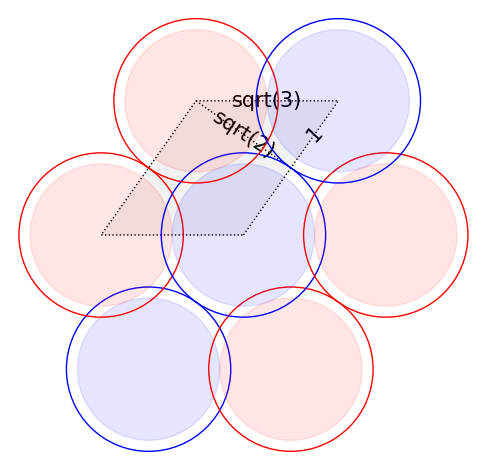

In [10]:
plot_extra_credit(sqrt(3)/2,acos(1/sqrt(3)))

### Extra credit answer
The area of the parallelogram is $2\sqrt2$ and the empty volume between the sheets
at the parallelogram is $2\sqrt2 - 2\pi/3$, so the empty volume per unit area is

In [11]:
%display latex
exact_result(1-pi/sqrt(18))

-\frac{1}{6} \, \sqrt{2} \pi + 1 \approx 0.259519510306939

Since this is a [compact packing](https://en.wikipedia.org/wiki/Circle_packing#Unequal_circles)
for a generalized definition of compact, I suspect this is the minimum, but I don't know how
to prove it.  Each deformation is in contact with 2 deformations on the same sheet and 4
deformations on the opposite sheet.

![Picture](20250103-e.png)

### Digression
The maximum volume of empty space per unit area approaches 2 when one or more pairs of
deformations, one on each sheet, are exactly aligned, which is unstable.

For a stable configuration, the maximum volume of empty space per unit area approaches
$\sqrt3$, where there are at least 3 clusters of deformations, arranged in a triangle,
and where a cluster has 3 deformations packed together on one sheet, and 1 deformation
on the opposite sheet centered at the center of the 3 deformations.

Making the rounds
-----------------

First, consider turning a circle inside-out: pushing one side through the opposite
side gives an inside-out middle with two loops.  Twisting the loops in 3D makes the
circle inside-out.

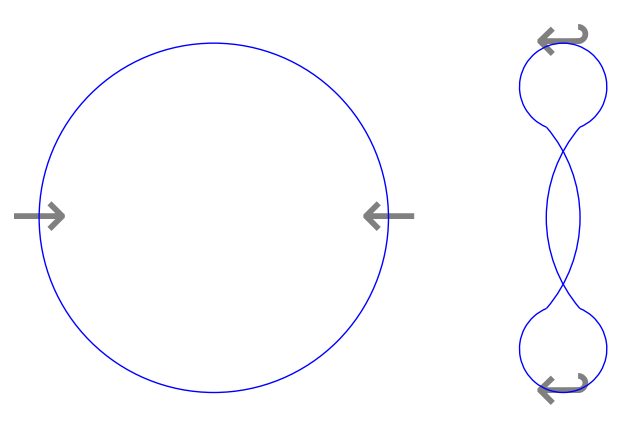

In [12]:
plot_mtr_1()

However, for a sphere, the two loops are connected as part of a torus.
I'm not seeing the equivalent of the twist for the torus.

Appendix
--------
Ancillary code.

In [13]:
# %load '20250103.sage'
def plot_fiddler(s,annotate=false,xoffset=0):
    w = sqrt(4-s^2/4)
    g = (
        polygon2d([(xoffset,0),(xoffset+s,0),(xoffset+s,w),(xoffset,w)],color='black',alpha=0.05)
        + arc((xoffset,w),1,sector=(0,-pi/2),axes=false)
        + line([(xoffset+1,w),(xoffset+s-1,w)])
        + arc((xoffset+s,w),1,sector=(-pi,-pi/2))
        + line([(xoffset,0),(xoffset+s/2-1,0)],color='red')
        + arc((xoffset+s/2,0),1,sector=(0,pi),color='red')
        + line([(xoffset+s/2+1,0),(xoffset+s,0)],color='red')
    )
    if annotate:
        g += (
            line([(xoffset,w),(xoffset+s/2,w),(xoffset+s/2,0),(xoffset,w)],color='gray',linestyle='dashed')
            + text('←s/2→',(xoffset+s/2*4/7,w),color='black',fontsize='30')
            + text('←w→',(xoffset+s/2,w*4/7),rotation=90,color='black',fontsize='30')
            + text('←2→',(xoffset+s/2*3/7,w*4/7),rotation=-180/pi*acos(s/4),color='black',fontsize='30')
        )
    return g

def plot_extra_credit(r,theta):
    def c(cx,cy,color):
        return (circle((cx,cy),1,axes=false,color=color)
                + circle((cx,cy),r,color=color,fill=true,alpha=0.1))
    
    return (sum([sum([c(2*r*i+2*cos(theta)*j,2*sin(theta)*j,color='blue' if is_even(i) else 'red')
                      for i in [max(-1-j,-1)..min(1-j,1)]]) for j in [-1,0,1]])
            + line([(2*r*i+2*cos(theta)*j,2*sin(theta)*j) for (i,j) in [(0,0),(0,1),(-1,1),(-1,0),(0,0)]],
                   linestyle='dotted',color='black')
            + line([(-2*r+2*cos(theta),2*sin(theta)),(cos(theta),sin(theta))],linestyle='dotted',color='black')
            + text(2*r,((-r+2*cos(theta)),2*sin(theta)),color='black',fontsize=15)
            + text(sqrt(4*r^2-1),(-r+3/2*cos(theta),3/2*sin(theta)),color='black',fontsize=15,rotation=-180/pi*cos(theta))
            + text(1,(3/2*cos(theta),3/2*sin(theta)),color='black',fontsize=15,rotation=180/pi*sin(theta))
            + polygon2d([(2*r*i+2*cos(theta)*j,2*sin(theta)*j) for (i,j) in [(0,0),(0,1),(-1,1),(-1,0),(0,0)]],
                   alpha=1/20,color='black')
           )

def plot3d_fiddler(s):
    w = sqrt(4-s^2/4)
    def f1(x,y):
        x0 = round(x/s)*s
        d2 = (x-x0)^2
        return 0 if d2 > 1 else sqrt(1-d2)
    def f2(x,y):
        x0 = round((x-s/2)/s)*s+s/2
        d2 = (x-x0)^2
        return w if d2 > 1 else w - sqrt(1-d2)
    return (plot3d(f1,(-5,5),(-5,5),opacity=1,mesh=true,color='blue',plot_points=[50,5],frame=false) +
            plot3d(f2,(-5,5),(-5,5),opacity=1,mesh=true,color='red',plot_points=[50,5]))

def plot3d_extra_credit():
    dx = 2
    dy = 2*sqrt(2)
    def f1(x,y):
        x0 = round(x/dx)*dx
        y0 = round(y/dy)*dy
        d2 = (x-x0)^2 + (y-y0)^2
        return 0 if d2 > 1 else sqrt(1-d2)
    def f2(x,y):
        x0 = round((x-dx/2)/dx)*dx + dx/2
        y0 = round((y-dy/2)/dy)*dy + dy/2
        d2 = (x-x0)^2 + (y-y0)^2
        return 1 if d2 > 1 else 1 - sqrt(1-d2)
    return (plot3d(f1,(-4,4),(-4,4),opacity=1,mesh=true,color='blue',plot_points=[70,70],frame=false) +
            plot3d(f2,(-4,4),(-4,4),opacity=1,mesh=true,color='red',plot_points=[70,70]))

def exact_result(expr):
    return LatexExpr(latex(expr) + '\\approx' + numerical_approx(expr))

def plot_mtr_1():
    x = 2-1/4*sin(pi/8)
    y = 3/4 - 1/4*cos(pi/8)
    theta = atan(y/(x-1.3))

    return (circle((0,0),1,axes=false)
            + text('→',(-1,0),fontsize=50,color='gray')
            + text('←',(1,0),fontsize=50,color='gray')
            + text('↩︎',(2,1),fontsize=50,color='gray')
            + text('↩︎',(2,-1),fontsize=50,color='gray')
            + arc((2,0.75),0.25,sector=(-3*pi/8,11*pi/8))
            + arc((2,-0.75),0.25,sector=(-11*pi/8,3*pi/8))
            + arc((1.3,0),sqrt((x-1.3)^2+y^2),sector=(-theta,theta))
            + arc((2.7,0),sqrt((x-1.3)^2+y^2),sector=(pi-theta,pi+theta))
    )
